# Create correlation plots

1. Import libraries
2. Define paths, oscillation and lat lon for plotting
3. Define function that maps correls
4. Import and prepare correlation matrices
5. Organise plot structure with GridSpec and plot correlations



### 1. Import libraries

In [1]:
import os
os.environ['PROJ_LIB'] = r'C:\Users\Mariliasr\Anaconda3\Library\share'

import numpy as np
import pandas as pd
import scipy.io as sio
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import cmocean
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.gridspec as gridspec

### 2. Define paths, oscillation and lat lon for plotting

In [2]:
%cd ~

filepath = r'C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Artigo\climate_correl'
out_path = r'C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Artigo\figs'

%cd $filepath

era_seasonal = sio.loadmat('era_seasonal.mat')
lat = era_seasonal['era_lat']
lon = era_seasonal['era_lon']
oscillation = 'sam_'

C:\Users\Mariliasr
C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Artigo\climate_correl


### 3. Define function that maps correls

In [3]:
def mapcorrels(R, p, lon, lat, ax, coastlines=False, grid=False):
    '''
    
    What: defines functions that plots R and p matrices 
    to a cylindrical projection.
    
    R: R matrix (lon, lat), 
    p: p matrix (lon, lat),
    ax: axis to be plotted,
    lon, lat: lon and lat vectors,
    coastlines: draws coastlines,
    grid: draws meridians and parallels.
    
    '''
    
    kw = {'levels':[0.05], 'colors':['k'], 'linewidths':[0.5]}
    map = Basemap(projection='cyl', llcrnrlon=lon.min(), 
                  llcrnrlat=lat.min(), urcrnrlon=lon.max(), 
                  urcrnrlat=lat.max(), resolution='c', ax=ax)
    map.fillcontinents(color=(0.55, 0.55, 0.55))
    
    if coastlines is True:
        map.drawcoastlines(color=(0.3, 0.3, 0.3))
    if grid is True:
        map.drawparallels((-30, 0),labels=[1,0,0,0], rotation=90, 
                           dashes=[1, 2], color=(0.3, 0.3, 0.3))
        map.drawmeridians((-50, -20, 10),labels=[0,0,0,1], 
                           dashes=[1, 2], color=(0.3, 0.3, 0.3))
    
    llons, llats = np.meshgrid(lon, lat)
    x, y = map(llons, llats)

    R_graph = map.contourf(llons, llats, R, 256, latlon=True, 
                           cmap=cmocean.cm.balance) 
    p_graph = map.contour(llons, llats, p, **kw, latlon=True)
    
    return R_graph

### 4. Import and prepare correlation matrices

In [1]:
def interpolate_array(np_array):
    '''
    What: interpolates np array using linear method
    np_array: 1d or 2d numpy array
    returns interpolated numpy array
    '''
    interpolated = pd.DataFrame(np_array).transpose().interpolate(method='linear', limit=300, limit_area=None)
    interpolated = pd.DataFrame(interpolated).transpose().interpolate(method='linear', limit=300, limit_area=None)
    interpolated = pd.DataFrame(interpolated).transpose().interpolate(method='linear', limit=300, limit_area=None)
    interpolated = interpolated.values
    
    return interpolated

In [4]:
# Prepare swh variables

swh_sum_R = np.load('swh_'+ oscillation + 'sum_R.npy')
swh_aut_R = np.load('swh_'+ oscillation + 'aut_R.npy')
swh_win_R = np.load('swh_'+ oscillation + 'win_R.npy')
swh_spr_R = np.load('swh_'+ oscillation + 'spr_R.npy')

swh_sum_p = pd.DataFrame(np.load('swh_'+ oscillation + 'sum_p.npy'))
swh_aut_p = pd.DataFrame(np.load('swh_'+ oscillation + 'aut_p.npy'))
swh_win_p = pd.DataFrame(np.load('swh_'+ oscillation + 'win_p.npy'))
swh_spr_p = pd.DataFrame(np.load('swh_'+ oscillation + 'spr_p.npy'))

swh_sum_R = interpolate_array(swh_sum_R)
swh_aut_R = interpolate_array(swh_aut_R)
swh_win_R = interpolate_array(swh_win_R)
swh_spr_R = interpolate_array(swh_spr_R)


swh_sum_R[20, 0] = -0.5
swh_aut_R[20, 0] = -0.5
swh_win_R[20, 0] = -0.5
swh_spr_R[20, 0] = -0.5

swh_sum_R[20, 1] = 0.5
swh_aut_R[20, 1] = 0.5
swh_win_R[20, 1] = 0.5
swh_spr_R[20, 1] = 0.5

swh_sum_p = swh_sum_p.transpose()
swh_aut_p = swh_aut_p.transpose()
swh_win_p = swh_win_p.transpose()
swh_spr_p = swh_spr_p.transpose()

swh_R = np.dstack((swh_sum_R,
                   swh_aut_R,
                   swh_win_R,
                   swh_spr_R
                  ))

swh_p = np.dstack((swh_sum_p,
                   swh_aut_p,
                   swh_win_p,
                   swh_spr_p
                  ))

In [5]:
# Prepare mwp variables

mwp_sum_R = np.load('mwp_'+ oscillation + 'sum_R.npy')
mwp_aut_R = np.load('mwp_'+ oscillation + 'aut_R.npy')
mwp_win_R = np.load('mwp_'+ oscillation + 'win_R.npy')
mwp_spr_R = np.load('mwp_'+ oscillation + 'spr_R.npy')

mwp_sum_p = pd.DataFrame(np.load('mwp_'+ oscillation + 'sum_p.npy'))
mwp_aut_p = pd.DataFrame(np.load('mwp_'+ oscillation + 'aut_p.npy'))
mwp_win_p = pd.DataFrame(np.load('mwp_'+ oscillation + 'win_p.npy'))
mwp_spr_p = pd.DataFrame(np.load('mwp_'+ oscillation + 'spr_p.npy'))

mwp_sum_R = interpolate_array(mwp_sum_R)
mwp_aut_R = interpolate_array(mwp_aut_R)
mwp_win_R = interpolate_array(mwp_win_R)
mwp_spr_R = interpolate_array(mwp_spr_R)


mwp_sum_R[20, 0] = -0.5
mwp_aut_R[20, 0] = -0.5
mwp_win_R[20, 0] = -0.5
mwp_spr_R[20, 0] = -0.5

mwp_sum_R[20, 1] = 0.5
mwp_aut_R[20, 1] = 0.5
mwp_win_R[20, 1] = 0.5
mwp_spr_R[20, 1] = 0.5

mwp_sum_p = mwp_sum_p.transpose()
mwp_aut_p = mwp_aut_p.transpose()
mwp_win_p = mwp_win_p.transpose()
mwp_spr_p = mwp_spr_p.transpose()

mwp_R = np.dstack((mwp_sum_R,
                   mwp_aut_R,
                   mwp_win_R,
                   mwp_spr_R
                  ))

mwp_p = np.dstack((mwp_sum_p,
                   mwp_aut_p,
                   mwp_win_p,
                   mwp_spr_p
                  ))

In [6]:
# Prepare u_mwd variables

u_mwd_sum_R = np.load('u_mwd_'+ oscillation + 'sum_R.npy')
u_mwd_aut_R = np.load('u_mwd_'+ oscillation + 'aut_R.npy')
u_mwd_win_R = np.load('u_mwd_'+ oscillation + 'win_R.npy')
u_mwd_spr_R = np.load('u_mwd_'+ oscillation + 'spr_R.npy')

u_mwd_sum_p = pd.DataFrame(np.load('u_mwd_'+ oscillation + 'sum_p.npy'))
u_mwd_aut_p = pd.DataFrame(np.load('u_mwd_'+ oscillation + 'aut_p.npy'))
u_mwd_win_p = pd.DataFrame(np.load('u_mwd_'+ oscillation + 'win_p.npy'))
u_mwd_spr_p = pd.DataFrame(np.load('u_mwd_'+ oscillation + 'spr_p.npy'))

u_mwd_sum_R = interpolate_array(u_mwd_sum_R)
u_mwd_aut_R = interpolate_array(u_mwd_aut_R)
u_mwd_win_R = interpolate_array(u_mwd_win_R)
u_mwd_spr_R = interpolate_array(u_mwd_spr_R)


u_mwd_sum_R[20, 0] = -0.5
u_mwd_aut_R[20, 0] = -0.5
u_mwd_win_R[20, 0] = -0.5
u_mwd_spr_R[20, 0] = -0.5

u_mwd_sum_R[20, 1] = 0.5
u_mwd_aut_R[20, 1] = 0.5
u_mwd_win_R[20, 1] = 0.5
u_mwd_spr_R[20, 1] = 0.5

u_mwd_sum_p = u_mwd_sum_p.transpose()
u_mwd_aut_p = u_mwd_aut_p.transpose()
u_mwd_win_p = u_mwd_win_p.transpose()
u_mwd_spr_p = u_mwd_spr_p.transpose()

u_mwd_R = np.dstack((u_mwd_sum_R,
                     u_mwd_aut_R,
                     u_mwd_win_R,
                     u_mwd_spr_R
                    ))

u_mwd_p = np.dstack((u_mwd_sum_p,
                     u_mwd_aut_p,
                     u_mwd_win_p,
                     u_mwd_spr_p
                    ))

In [7]:
# Prepare v_mwd variables

v_mwd_sum_R = np.load('v_mwd_'+ oscillation + 'sum_R.npy')
v_mwd_aut_R = np.load('v_mwd_'+ oscillation + 'aut_R.npy')
v_mwd_win_R = np.load('v_mwd_'+ oscillation + 'win_R.npy')
v_mwd_spr_R = np.load('v_mwd_'+ oscillation + 'spr_R.npy')

v_mwd_sum_p = pd.DataFrame(np.load('v_mwd_'+ oscillation + 'sum_p.npy'))
v_mwd_aut_p = pd.DataFrame(np.load('v_mwd_'+ oscillation + 'aut_p.npy'))
v_mwd_win_p = pd.DataFrame(np.load('v_mwd_'+ oscillation + 'win_p.npy'))
v_mwd_spr_p = pd.DataFrame(np.load('v_mwd_'+ oscillation + 'spr_p.npy'))

v_mwd_sum_R = interpolate_array(v_mwd_sum_R)
v_mwd_aut_R = interpolate_array(v_mwd_aut_R)
v_mwd_win_R = interpolate_array(v_mwd_win_R)
v_mwd_spr_R = interpolate_array(v_mwd_spr_R)


v_mwd_sum_R[20, 0] = -0.5
v_mwd_aut_R[20, 0] = -0.5
v_mwd_win_R[20, 0] = -0.5
v_mwd_spr_R[20, 0] = -0.5

v_mwd_sum_R[20, 1] = 0.5
v_mwd_aut_R[20, 1] = 0.5
v_mwd_win_R[20, 1] = 0.5
v_mwd_spr_R[20, 1] = 0.5

v_mwd_sum_p = v_mwd_sum_p.transpose()
v_mwd_aut_p = v_mwd_aut_p.transpose()
v_mwd_win_p = v_mwd_win_p.transpose()
v_mwd_spr_p = v_mwd_spr_p.transpose()

v_mwd_R = np.dstack((v_mwd_sum_R,
                    v_mwd_aut_R,
                    v_mwd_win_R,
                    v_mwd_spr_R
                   ))

v_mwd_p = np.dstack((v_mwd_sum_p,
                    v_mwd_aut_p,
                    v_mwd_win_p,
                    v_mwd_spr_p
                   ))

### 5. Organise plot structure with GridSpec and plot correlations

C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Artigo\figs


C:\Users\Mariliasr\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


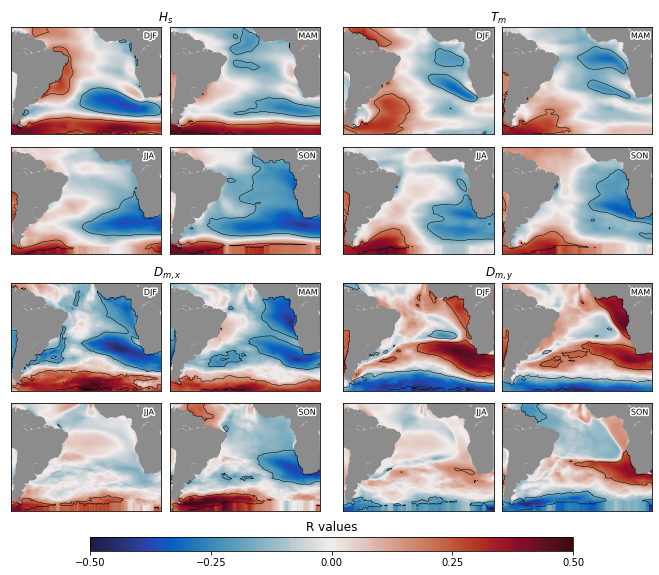

In [8]:
%cd $out_path

# Create plot structure and axes

fig = plt.figure(figsize=(11.5, 10))


gs = gridspec.GridSpec(nrows=8,
                       ncols=9, 
                       height_ratios=[1/11, 1,
                                      1, 1/11, 1,
                                      1, 1/11, 1/8],
                       width_ratios=[1, 1, 1,
                                     1, 1/11,
                                     1, 1, 1, 1],
                       wspace=1/7.5,
                       hspace=1/10)

hst = plt.subplot(gs[0, 0:4])
hs1 = plt.subplot(gs[1, 0:2])
hs2 = plt.subplot(gs[1, 2:4])
hs3 = plt.subplot(gs[2, 0:2])
hs4 = plt.subplot(gs[2, 2:4])

tmt = plt.subplot(gs[0, 5:9])
tm1 = plt.subplot(gs[1, 5:7])
tm2 = plt.subplot(gs[1, 7:9])
tm3 = plt.subplot(gs[2, 5:7])
tm4 = plt.subplot(gs[2, 7:9])

dmxt = plt.subplot(gs[3, 0:4])
dmx1 = plt.subplot(gs[4, 0:2])
dmx2 = plt.subplot(gs[4, 2:4])
dmx3 = plt.subplot(gs[5, 0:2])
dmx4 = plt.subplot(gs[5, 2:4])

dmyt = plt.subplot(gs[3, 5:9])
dmy1 = plt.subplot(gs[4, 5:7])
dmy2 = plt.subplot(gs[4, 7:9])
dmy3 = plt.subplot(gs[5, 5:7])
dmy4 = plt.subplot(gs[5, 7:9])

bar = plt.subplot(gs[7, 1:8])
bar.set_title('R values')

# Lists of axes to be used in loops
hs_ax = [hs1, hs2,
         hs3, hs4]
tm_ax = [tm1, tm2,
         tm3, tm4]
dmx_ax = [dmx1, dmx2,
          dmx3, dmx4]
dmy_ax = [dmy1, dmy2,
          dmy3, dmy4]

# Titles and texts
hst.text(0.478, -0.8, '$H_{s}$',
         va='bottom', size=12)
hst.axis('off')

tmt.text(0.475, -0.8, '$T_{m}$',
         va='bottom', size=12)
tmt.axis('off')

dmxt.text(0.46, -0.8, '$D_{m,x}$',
          va='bottom', size=12)
dmxt.axis('off')

dmyt.text(0.46, -0.8, '$D_{m,y}$',
          va='bottom', size=12)
dmyt.axis('off')

summer = [hs1, tm1,
          dmx1, dmy1]
autumn = [hs2, tm2,
          dmx2, dmy2]
winter = [hs3, tm3,
          dmx3, dmy3]
spring = [hs4, tm4,
          dmx4, dmy4]

import matplotlib.patheffects as path_effects
style = dict(fontstretch='extra-expanded',
             fontweight='medium',
             path_effects=[path_effects.Stroke(linewidth=3,
                                               foreground='white'),
                           path_effects.Normal()])

for ax in summer:
    ax.text(18, 7, 'DJF',
            size=8, **style)
for ax in autumn:
    ax.text(15, 7, 'MAM',
            size=8, **style)
for ax in winter:
    ax.text(18, 7, 'JJA', 
            size=8, **style)
for ax in spring:
    ax.text(15, 7, 'SON',
            size=8, **style)

for e in range(len(hs_ax)):
    R_graph = mapcorrels(swh_R[:, :, e], swh_p[:, :, e], 
                         lon, lat, hs_ax[e])
    mapcorrels(mwp_R[:, :, e], mwp_p[:, :, e], 
               lon, lat, tm_ax[e])
    mapcorrels(u_mwd_R[:, :, e], u_mwd_p[:, :, e], 
               lon, lat, dmx_ax[e])
    mapcorrels(v_mwd_R[:, :, e], v_mwd_p[:, :, e], 
               lon, lat, dmy_ax[e])

plt.colorbar(R_graph, cmap=cmocean.cm.balance, 
             cax=bar, orientation='horizontal', 
             values=(-0.5, -0.25, 0, 0.25, 0.5), 
             ticks=(-0.5, -0.25, 0, 0.25, 0.5))
    

plt.savefig(oscillation + 'corr.png')



plt.show()
